# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [17]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

Image dimensions: (450, 660, 3)


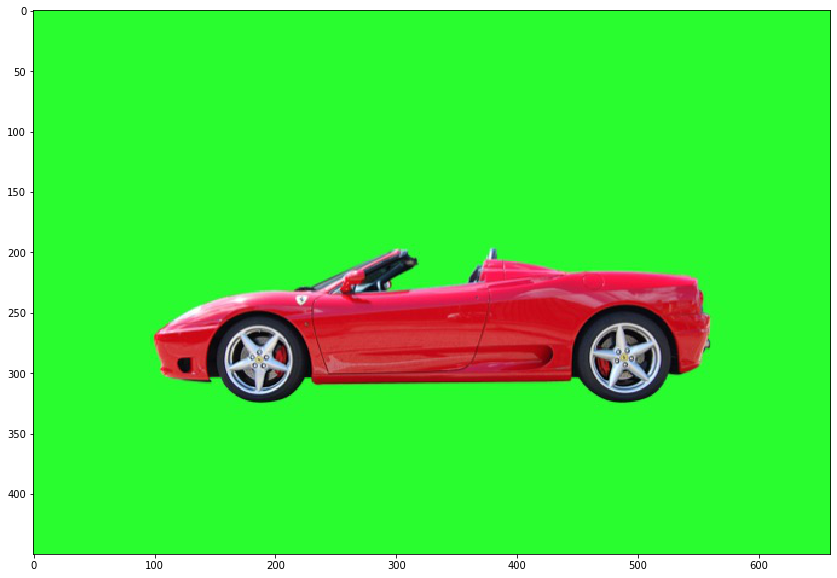

In [18]:
# Display the image
plt.figure(figsize=(20,10))
plt.imshow(image)

### Define the color threshold

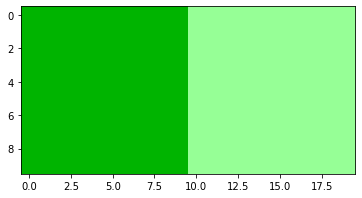

In [73]:
## Define color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([150,255,150])

# show color threshold
from PIL import Image

thresholds = np.zeros([10,20,3], dtype = 'uint8')
thresholds[:,:10] = lower_green
thresholds[:,10:] = upper_green

plt.imshow(Image.fromarray(thresholds))

### Create a mask

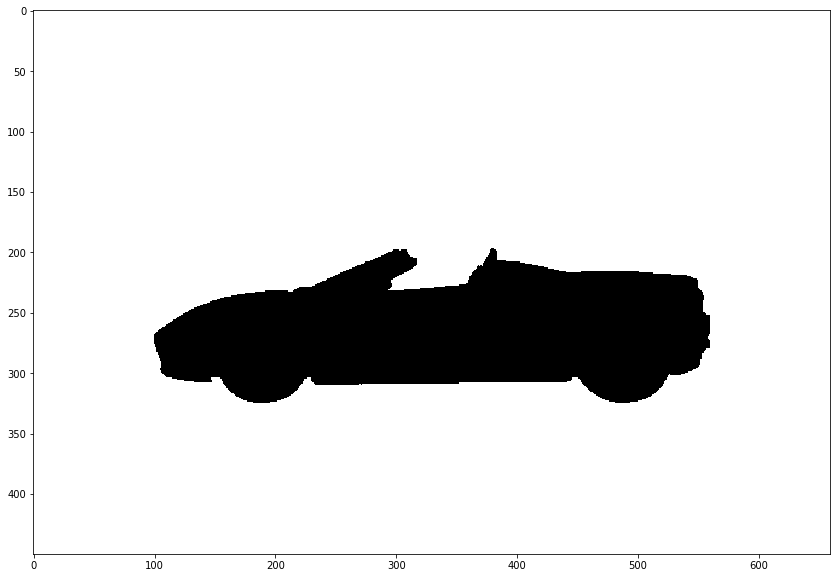

In [76]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.figure(figsize=(20,10))
plt.imshow(mask, cmap='gray')

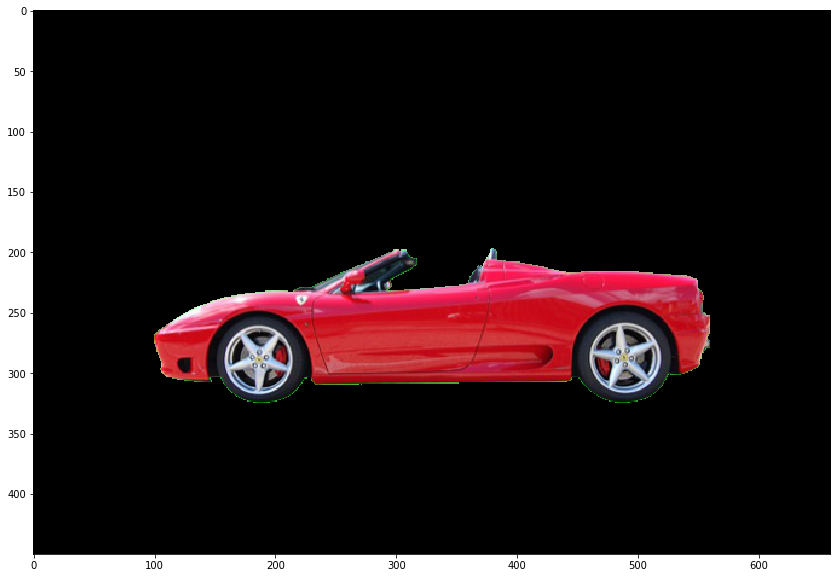

In [75]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.figure(figsize=(20,10))
plt.imshow(masked_image)

### Mask and add a background image

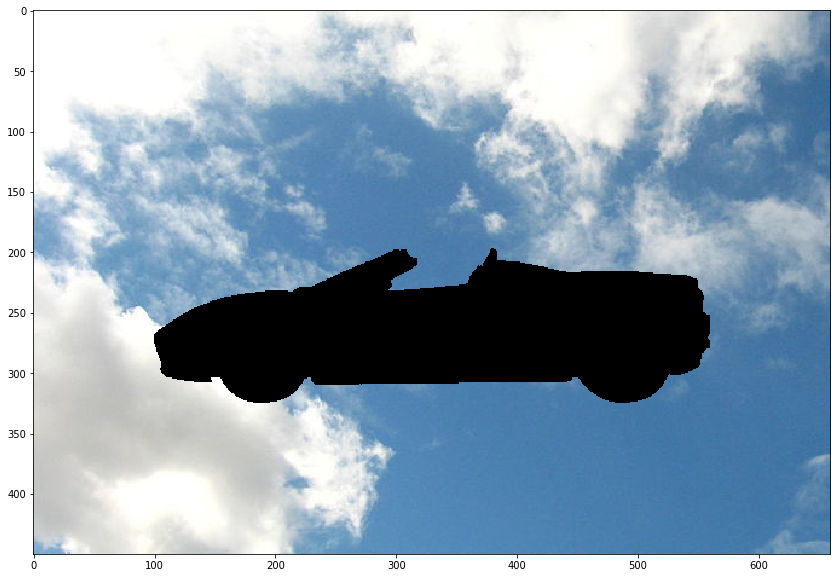

In [88]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## TODO: Crop it or resize the background to be the right size (450x660)
crop_background = background_image[0:450, 0:660].copy()

## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
crop_background[mask == 0] = [0,0,0]

## TODO: Display the background and make sure 
plt.figure(figsize=(20,10))
plt.imshow(crop_background)

### Create a complete image

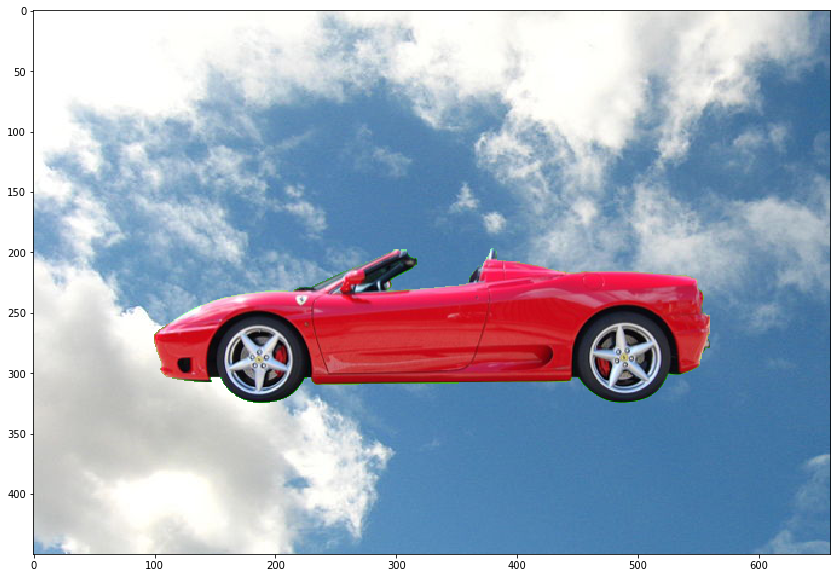

In [91]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + crop_background

plt.figure(figsize=(20,10))
plt.imshow(complete_image)